## PREPARATION

In [1]:
import os
import glob

curfolder = os.getcwd()
print(curfolder)

# this is our mt data C:\Users\kadava\Documents\Github\FLESH_3Dtracking_new\projectdata
## MT
datafolder = curfolder + '/TS_motiontracking/'
vidfolder = curfolder + '/Videos/'
acfolder = curfolder + '/TS_acoustics/'

mttotrack = glob.glob(datafolder + 'mt*.csv', recursive=True)
bbtotrack = glob.glob(datafolder + 'bb*.csv', recursive=True)
idtotrack = glob.glob(datafolder + 'id*.csv', recursive=True)
vidtotrack = glob.glob(vidfolder + '*.avi', recursive=True)
envtotrack = glob.glob(acfolder + 'env*.csv', recursive=True)
f0totrack = glob.glob(acfolder + 'f0*.csv', recursive=True)

print(mttotrack)
print(idtotrack)
print(vidtotrack)
print(bbtotrack)



e:\FLESH_ContinuousBodilyEffort\TS_processing
['e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_0_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_18_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_19_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_1_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_20_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_21_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_22_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_23_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_24_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_25_p0.csv', 'e:\\FLESH_ContinuousBodilyEffort\\TS_processing/TS_motiontracking\\mt_0_1_26_p0.csv'

## FUNCTION TO ANIMATE MULTIMODAL SIGNALS

In [17]:
import tempfile
import shutil
import matplotlib.pyplot as plt


# what is the window size in seconds
window = 4

# a function that generates a plot containing two panel time series of the envelope (panel 1) and the pose time series (panel 2) with a window of 4 seconds
def plot_body_signals(body, maxbody, minbody, env, maxenv, minenv, bb, maxbb, minbb, midpoint):
    # make a temporary folder
    tempfolder = tempfile.mkdtemp()
    fig, ax = plt.subplots(3, 1, figsize=(14, 10))
    # selection 4 seconds from midpoint
    start = midpoint - window/2
    end = midpoint + window/2
    # if start is negative, set it to 0
    if start < 0:
        start = 0
    # subset the body time series and amplitude envelope based on the start and end
    body = body[(body['Time'] >= start) & (body['Time'] <= end)]
    env = env[(env['time'] >= start) & (env['time'] <= end)]
    bb = bb[(bb['time'] >= start) & (bb['time'] <= end)]
    # do a cross correlation between the envelope and the pose time series
    # recenter time
    body['Time'] = body['Time'] - midpoint
    env['time'] = env['time'] - midpoint
    bb['time'] = bb['time'] - midpoint
    # Plot the amplitude envelope
    ax[0].plot(env['time'], env['envelope'], label = 'envelope', linewidth=8, color='green')
    ax[0].legend() # show labels in legend
    ax[0].legend(prop={'size': 24})
    # Plot the pose time series with a thick line semitransparent, but different colors (black & grey)
    ax[1].plot(body['Time'], body['RWrist_speed'], label='RWrist (speed)', color='magenta', alpha=0.8, linewidth=4)
    ax[1].plot(body['Time'], body['LWrist_speed'], label='LWrist (speed)', color='darkblue', alpha=0.8, linewidth=4)
    #ax[1].set_xlabel('Time (ms)', fontsize=24)
    ax[1].legend() # show labels in legend
    ax[1].legend(prop={'size': 24})
    plt.tight_layout()
    # plot the bb
    ax[2].plot(bb['time'], bb['COPc'], label='Center of pressure (change)', color='black', alpha=0.8, linewidth=4)
    ax[2].set_xlabel('Time (ms)', fontsize=24)
    ax[2].legend() # show labels in legend
    ax[2].legend(prop={'size': 24})
    plt.tight_layout()
    # set the x axes to centered by 0 minus and plus half the window
    ax[0].set_xlim(-window/2, window/2)
    ax[1].set_xlim(-window/2, window/2)
    ax[2].set_xlim(-window/2, window/2)
    # add a vertical line in the plot at 0
    ax[0].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[1].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[2].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)

    # ad horizontal lines at 15 for first plot
    #ax[0].axhline(y=15, color='r', linestyle='--', linewidth=4, alpha=0.8)
    # set the y axes 
    # what is the total max and min value in env
    #maxenv = max(env['env'])
    #minenv = min(env['env'])
    ax[0].set_ylim(minenv, maxenv)
    # speed according to max value within both wrists
    #maxbody = max(body['RWrist_speed'].max(), body['LWrist_speed'].max())
    ax[1].set_ylim(minbody, maxbody) #
    # bb according to max value
    #maxbb = max(bb['COPc'].max())
    #minbb = min(bb['COPc'].min())
    ax[2].set_ylim(minbb, maxbb)
    
    # increase font size
    for a in ax:
        a.tick_params(axis='both', which='major', labelsize=24)
        a.tick_params(axis='both', which='major', width=6)
    # save the plot
    tpf = tempfolder + 'tempfig.png'
    plt.savefig(tpf )
    plt.close()
    img = cv2.imread(tpf)
    shutil.rmtree(tempfolder)
    return img

## ANIMATION OF MULTIMODAL SIGNALS

From https://www.envisionbox.org/embedded_AnimatingSoundMovement.html


e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\mt_0_2_0_p0.csv
e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\bb_0_2_0_p0.csv
e:\FLESH_ContinuousBodilyEffort\TS_processing/TS_motiontracking\id_0_2_0_p0.csv


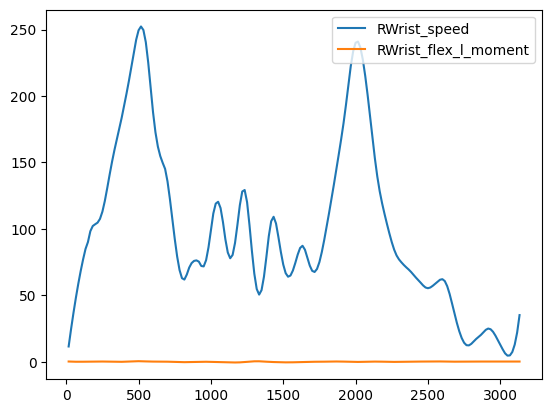

In [35]:
sample_mt = mttotrack[55]
print(sample_mt)
sample_bb = bbtotrack[56]
print(sample_bb)
sample_id = idtotrack[53]
print(sample_id)

# plot RWrist_speed, COPc, and rist_flex_l_moment

# load the data
mt = pd.read_csv(sample_mt)
bb = pd.read_csv(sample_bb)
id = pd.read_csv(sample_id)

#plot them with time
plt.plot(mt['Time'], mt['RWrist_speed'], label='RWrist_speed')
#plt.plot(bb['time'], bb['COPc'], label='COPc')
plt.plot(id['time'], id['wrist_flex_l_moment'], label='RWrist_flex_l_moment')
plt.legend()
plt.show()

In [18]:

import tqdm
import cv2
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import scipy

resampl_rate = 200
smooth_hz = 8

anifolder = curfolder + '/Animations/'

for file in mttotrack:
    # get the trialid
    trialid = file.split('\\')[-1].split('.')[0]
    # get rid of the mt_
    trialid = trialid[3:]
    print(trialid)

    # load it
    mt = pd.read_csv(file)

    # convert time to seconds
    mt['Time'] = mt['Time']/1000

    # get the max and min values for the speed
    maxbody = max(mt['RWrist_speed'].max(), mt['LWrist_speed'].max())
    minbody = 0

    ###### PREPARING AUDIO

    # get audio file from envtotracki with the same trialid
    envfile = [x for x in envtotrack if trialid in x][0]

    env = pd.read_csv(envfile)

    # convert time to seconds
    env['time'] = env['time']/1000

    print(env)

    # get the max and min values for the envelope
    maxenv = max(env['envelope'])
    minenv = min(env['envelope'])

    ###### PREPARING BB

    # get bb file bbtotrack with the same trialid
    bbfile = [x for x in bbtotrack if trialid in x][0]

    bb = pd.read_csv(bbfile)

    # convert time to seconds
    bb['time'] = bb['time']/1000

    
    print(bb)

    # get the max and min values for the bb
    maxbb = max(bb['COPc'])
    minbb = min(bb['COPc'])

    # PREPARE VIDEO
    
    # get the video file with the same trialid
    videofile = [x for x in vidtotrack if trialid in x][0]
    print(videofile)

    #audiofilename = inputfol + vidf.replace(".mp4", ".wav")
    #videofilenamemasked = videofilename.replace(".mp4", "_masked.mp4")
    #print(videofilenamemasked)
    # Get the amplitude envelope
    #ampv, sr = amp_envelope(audiofilename)
    # get the raw audio
    #rawaudio, sr = librosa.load(audiofilename, sr=None)


    # load the video in opencv and prepare to loop over it
    capture = cv2.VideoCapture(videofile)
    frameWidth = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
    frameHeight = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
    fps = capture.get(cv2.CAP_PROP_FPS)
    # out
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(anifolder + '/' + trialid + '_sample_wrist_multimodal_animated.mp4', fourcc, fps, (int(frameWidth)*4, int(frameHeight)))
    # loop over the video
    # loop through the video and add the plot to the video on left upper corner in small inset
    frame_number = 0
    # with progress bar
    for i in tqdm.tqdm(range(int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))):
        ret, frame = capture.read()
        if ret == True:
            img = plot_body_signals(mt, maxbody, minbody, env, maxenv, minenv, bb, maxbb, minbb, frame_number/fps)
            # resize the image
            img = cv2.resize(img, (int(frameWidth*3), int(frameHeight)))
            # lets put the plot on the right side of the frame using concat
            frame = np.concatenate([frame, img], axis=1)            
            out.write(frame)
            frame_number += 1
            # also show the frame (optional)
            #cv2.imshow('Frame', frame)
            #if cv2.waitKey(1) & 0xFF == ord('q'):
            #   break
        else:
            break
    capture.release()
    out.release()    
    cv2.destroyAllWindows()

    break


0_1_0_p0
            time  audio  envelope
0       0.000000    0.0  0.012199
1       0.000021    0.0  0.012199
2       0.000042    0.0  0.012199
3       0.000063    0.0  0.012199
4       0.000083    0.0  0.012199
...          ...    ...       ...
240268  5.005583    0.0  0.012200
240269  5.005604    0.0  0.012200
240270  5.005625    0.0  0.012200
240271  5.005646    0.0  0.012200
240272  5.005667    0.0  0.012200

[240273 rows x 3 columns]
          time  left_back  right_forward  right_back  left_forward     COPXc  \
0     0.000000   1.152663       0.783788    1.602603      1.281681  0.000412   
1     0.002000   1.152858       0.783666    1.603292      1.281453  0.000341   
2     0.004000   1.153067       0.783581    1.603912      1.281321  0.000278   
3     0.006000   1.153288       0.783533    1.604472      1.281271  0.000222   
4     0.008000   1.153520       0.783518    1.604977      1.281288  0.000175   
...        ...        ...            ...         ...           ...       ...

  0%|          | 0/299 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_17644\2293818436.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['Time'] = body['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_17644\2293818436.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env['time'] = env['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_17644\2293818436.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [43]:
import ffmpeg

# add the audio
# load in the video again and add the audio using moviepy
for vidf in videofiles:
    print(vidf)
    # go two folders back in the directory
    #v = vidf.split('\\')[-3] + '/' + vidf.split('\\')[-2] + '/'
    # connect 0-8 element of path vidf
    v = vidf.split('\\')[:8]
    v = '/'.join(v[:4]) + '/'
    # find in v mp4 file with _animated
    animatedfile = glob.glob(v + '*_animated.mp4')[0]
    print(animatedfile)
    audiofilename = [x for x in foi_wav if '0_1_trial_35' in x][0]
    print(audiofilename)
    input_audio = ffmpeg.input(audiofilename)
    print(input_audio)
    print('Loading the video')
    input_video = ffmpeg.input(animatedfile)
    print(input_video)

    print('Combining audio and video')
    output_path = animatedfile.replace('.mp4', '_animated_audio.mp4')
    ffmpeg.concat(input_video, input_audio, v=1, a=1).output(output_path).run(overwrite_output=True)
        
    #save it
    print('Saving the video')

C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata\Session_0_1\P1\0_1_35_p1\pose-2d-trackingvideos\video1.avi
C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata/Session_0_1/P1/0_1_35_p1\0_1_35_p1_sample_wrist_animated.mp4
E:\charade_experiment_WORKSPACE\xdf_procedure\data\Data_processed\Data_trials/Audio_48\0_1_trial_35_Mic_nominal_srate48000_p1_langzaam_combinatie.wav
input(filename='E:\\charade_experiment_WORKSPACE\\xdf_procedure\\data\\Data_processed\\Data_trials/Audio_48\\0_1_trial_35_Mic_nominal_srate48000_p1_langzaam_combinatie.wav')[None] <1de3190524b5>
Loading the video
input(filename='C:/Users/kadava/Documents/Github/FLESH_3Dtracking_new/projectdata/Session_0_1/P1/0_1_35_p1\\0_1_35_p1_sample_wrist_animated.mp4')[None] <c1358c19e5aa>
Combining audio and video
Saving the video


## FUNCTION TO ANIMATE FORCES

In [2]:
import tempfile
import shutil
import matplotlib.pyplot as plt


# what is the window size in seconds
window = 4

# a function that generates a plot containing two panel time series of the envelope (panel 1) and the pose time series (panel 2) with a window of 4 seconds
def plot_forces(marker1, maxmarker1, minmarker1, marker2, maxmarker2, minmarker2, marker3, maxmarker3, minmarker3, marker4, maxmarker4, minmarker4, midpoint):
    # make a temporary folder
    tempfolder = tempfile.mkdtemp()
    fig, ax = plt.subplots(4, 1, figsize=(14, 10))
    # selection 4 seconds from midpoint
    start = midpoint - window/2
    end = midpoint + window/2
    # if start is negative, set it to 0
    if start < 0:
        start = 0
    # subset the body time series and amplitude envelope based on the start and end
    marker1 = marker1[(marker1['Time'] >= start) & (marker1['Time'] <= end)]
    marker2 = marker2[(marker2['time'] >= start) & (marker2['time'] <= end)]
    marker3 = marker3[(marker3['time'] >= start) & (marker3['time'] <= end)]
    marker4 = marker4[(marker4['time'] >= start) & (marker4['time'] <= end)]
    
    # do a cross correlation between the envelope and the pose time series
    # recenter time
    marker1['Time'] = marker1['Time'] - midpoint
    marker2['time'] = marker2['time'] - midpoint
    marker3['time'] = marker3['time'] - midpoint
    marker4['time'] = marker4['time'] - midpoint

    # Plot SPEED
    ax[0].plot(marker1['Time'], marker1['RElbow_speed'], label='RElbow_speed', color='magenta', alpha=0.8, linewidth=4)
    ax[0].plot(marker1['Time'], marker1['LElbow_speed'], label='LElbow_speed', color='darkblue', alpha=0.8, linewidth=4)
    ax[0].legend() # show labels in legend
    ax[0].legend(prop={'size': 24})
    plt.tight_layout()

    # Plot ARM_FLEX MOMENT
    ax[1].plot(marker2['time'], marker2['elbow_flex_r_moment'], label = 'elbow_flex_r_moment', linewidth=4, color='magenta')
    ax[1].plot(marker2['time'], marker2['elbow_flex_l_moment'], label = 'elbow_flex_l_moment', linewidth=4, color='darkblue')
    ax[1].legend() # show labels in legend
    ax[1].legend(prop={'size': 24})

    
    # Plot PELVIS
    ax[2].plot(marker3['time'], marker3['pelvis_rotation_moment'], label='pelvis_rotation_moment', color='green', alpha=0.8, linewidth=4)
    #ax[2].plot(marker3['time'], marker3['elbow_add_l_moment'], label='elbow_add_l_moment', color='darkblue', alpha=0.8, linewidth=4)
    ax[2].legend() # show labels in legend
    ax[2].legend(prop={'size': 24})
    plt.tight_layout()

    # plot NECK
    ax[3].plot(marker4['time'], marker4['neck_rotation_moment'], label='neck_rotation_moment', color='black', alpha=0.8, linewidth=4)
    #ax[3].plot(marker4['time'], marker4['elbow_rot_l_moment'], label='elbow_rot_l_moment', color='darkblue', alpha=0.8, linewidth=4)
    ax[3].set_xlabel('Time (ms)', fontsize=24)
    ax[3].legend() # show labels in legend
    ax[3].legend(prop={'size': 24})
    plt.tight_layout()

    # set the x axes to centered by 0 minus and plus half the window
    ax[0].set_xlim(-window/2, window/2)
    ax[1].set_xlim(-window/2, window/2)
    ax[2].set_xlim(-window/2, window/2)
    ax[3].set_xlim(-window/2, window/2)

    # add a vertical line in the plot at 0
    ax[0].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[1].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[2].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)
    ax[3].axvline(x=0, color='r', linestyle='--', linewidth=4, alpha=0.8)

    # set the y axes
    ax[0].set_ylim(minmarker1, maxmarker1) #
    ax[1].set_ylim(minmarker2, maxmarker2)
    ax[2].set_ylim(minmarker3, maxmarker3)
    ax[3].set_ylim(minmarker4, maxmarker4)
    
    # increase font size
    for a in ax:
        a.tick_params(axis='both', which='major', labelsize=24)
        a.tick_params(axis='both', which='major', width=6)
    # save the plot
    tpf = tempfolder + 'tempfig.png'
    plt.savefig(tpf )
    plt.close()
    img = cv2.imread(tpf)
    shutil.rmtree(tempfolder)
    return img

## ANIMATION OF FORCES

0_1_0_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_0_p0.avi
File exists
0_1_18_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_18_p0.avi
File exists
0_1_19_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_19_p0.avi
File exists
0_1_1_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_1_p0.avi
File exists
0_1_20_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_20_p0.avi
File exists
0_1_21_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_21_p0.avi
File exists
0_1_22_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_22_p0.avi
File exists
0_1_23_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_23_p0.avi
File exists
0_1_24_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_24_p0.avi
File exists
0_1_25_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_25_p0.avi
File exists
0_1_26_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_1_26_p0.avi
File exists
0_1_2_p0
e:\FLESH_Continu

  0%|          | 0/455 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_71_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_71_p0.avi


  0%|          | 0/246 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_72_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_72_p0.avi


  0%|          | 0/301 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_73_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_73_p0.avi


  0%|          | 0/320 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_74_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_74_p0.avi


  0%|          | 0/302 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_75_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_75_p0.avi


  0%|          | 0/320 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_76_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_76_p0.avi


  0%|          | 0/224 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_77_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_77_p0.avi


  0%|          | 0/272 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_78_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_78_p0.avi


  0%|          | 0/257 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_79_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_79_p0.avi


  0%|          | 0/254 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_7_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_7_p0.avi


  0%|          | 0/472 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_80_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_80_p0.avi


  0%|          | 0/204 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_81_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_81_p0.avi


  0%|          | 0/248 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_82_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_82_p0.avi


  0%|          | 0/317 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_83_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_83_p0.avi


  0%|          | 0/333 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_84_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_84_p0.avi


  0%|          | 0/302 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_85_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_85_p0.avi


  0%|          | 0/249 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_86_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_86_p0.avi


  0%|          | 0/221 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_87_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_87_p0.avi


  0%|          | 0/221 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_88_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_88_p0.avi


  0%|          | 0/176 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_89_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_89_p0.avi


  0%|          | 0/333 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_8_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_8_p0.avi


  0%|          | 0/189 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_90_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_90_p0.avi


  0%|          | 0/234 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_91_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_91_p0.avi


  0%|          | 0/188 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_9_p0
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_9_p0.avi


  0%|          | 0/232 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_100_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_100_p1.avi


  0%|          | 0/400 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_101_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_101_p1.avi


  0%|          | 0/211 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_102_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_102_p1.avi


  0%|          | 0/307 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_103_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_103_p1.avi


  0%|          | 0/409 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_104_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_104_p1.avi


  0%|          | 0/251 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_105_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_105_p1.avi


  0%|          | 0/237 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_106_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_106_p1.avi


  0%|          | 0/202 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

0_2_107_p1
e:\FLESH_ContinuousBodilyEffort\TS_processing/Videos\0_2_107_p1.avi


  0%|          | 0/342 [00:00<?, ?it/s]C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker1['Time'] = marker1['Time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker2['time'] = marker2['time'] - midpoint
C:\Users\kadava\AppData\Local\Temp\ipykernel_33288\1956729555.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

KeyboardInterrupt: 

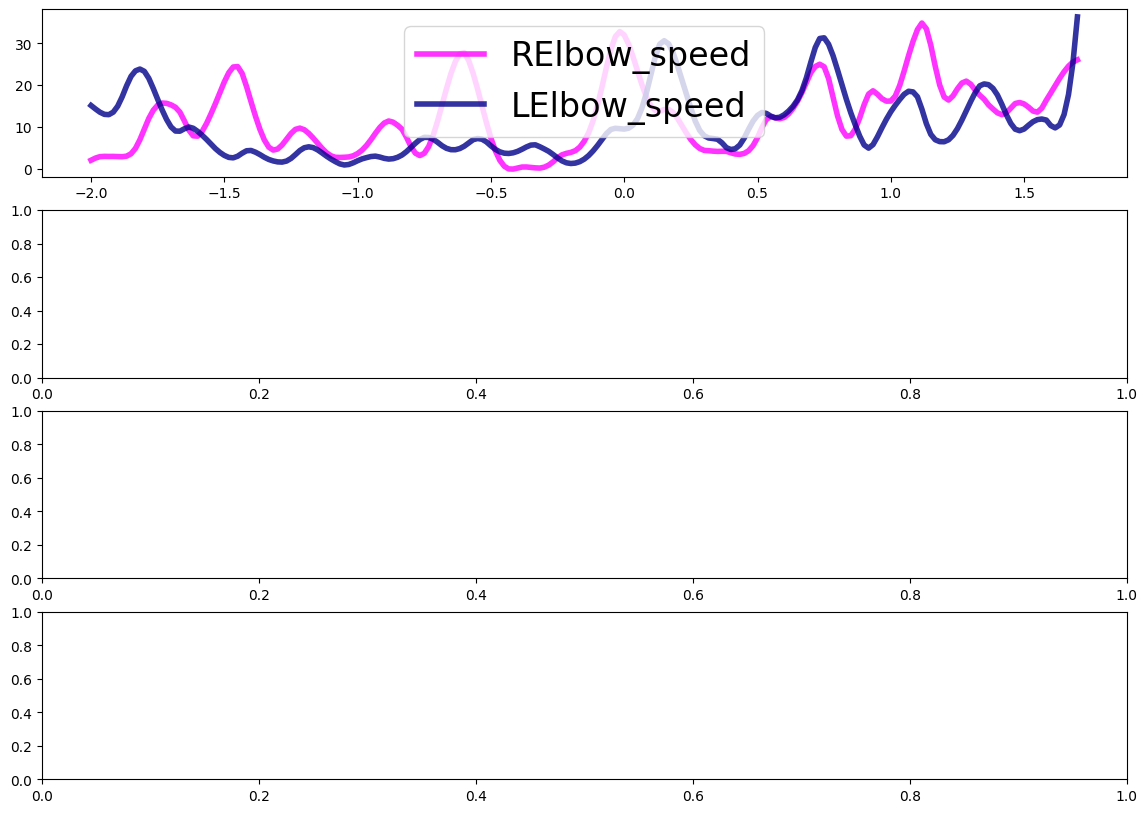

In [3]:

import tqdm
import cv2
import numpy as np
import pandas as pd

anifolder = curfolder + '/Animations/'

# from mttotrack, get rid of all files with tpose in it
mttotrack = [x for x in mttotrack if 'tpose' not in x]

for file in mttotrack:
    # get the trialid
    trialid = file.split('\\')[-1].split('.')[0]
    # get rid of the mt_
    trialid = trialid[3:]
    print(trialid)

    # load it
    mt = pd.read_csv(file)

    # convert time to seconds
    mt['Time'] = mt['Time']/1000

    # get the max and min values for the speed
    maxbody = max(mt['RElbow_speed'].max(), mt['LElbow_speed'].max())
    minbody = 0

    ###### PREPARING FORCES

    # get audio file from envtotracki with the same trialid
    idfile = [x for x in idtotrack if trialid in x][0]

    id = pd.read_csv(idfile)

    # convert time to seconds
    id['time'] = id['time']/1000

    # get the max and min values for elbow flex
    maxelb = max(id['elbow_flex_r_moment'].max(), id['elbow_flex_l_moment'].max())
    minelb = min(id['elbow_flex_r_moment'].min(), id['elbow_flex_l_moment'].min())

    # get max min for pelvis 
    maxpel = max(id['pelvis_rotation_moment'])
    minpel = min(id['pelvis_rotation_moment'])

    # get max min for 
    maxneck = max(id['neck_rotation_moment'])
    minneck = min(id['neck_rotation_moment'])


    # PREPARE VIDEO
    
    # get the video file with the same trialid
    videofile = [x for x in vidtotrack if trialid in x][0]
    print(videofile)

    # load the video in opencv and prepare to loop over it
    capture = cv2.VideoCapture(videofile)
    frameWidth = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
    frameHeight = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
    fps = capture.get(cv2.CAP_PROP_FPS)
    # out
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')

    outputpath = anifolder + '/' + trialid + '_sample_body_forces_animated.mp4'
    # check if the file exists
    if os.path.exists(outputpath):
        print('File exists')
        continue
    else:
        out = cv2.VideoWriter(outputpath, fourcc, fps, (int(frameWidth)*4, int(frameHeight)))
        # loop over the video
        frame_number = 0
        # with progress bar
        for i in tqdm.tqdm(range(int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))):
            ret, frame = capture.read()
            if ret == True:
                img = plot_forces(mt, maxbody, minbody, id, maxelb, minelb, id, maxpel, minpel, id, maxneck, minneck, frame_number/fps)
                # resize the image
                img = cv2.resize(img, (int(frameWidth*3), int(frameHeight)))
                # lets put the plot on the right side of the frame using concat
                frame = np.concatenate([frame, img], axis=1)            
                out.write(frame)
                frame_number += 1
                # also show the frame (optional)
                #cv2.imshow('Frame', frame)
                #if cv2.waitKey(1) & 0xFF == ord('q'):
                #   break
            else:
                break
        capture.release()
        out.release()    
        cv2.destroyAllWindows()

